### Approach
- Clean and transform data
    - Dataset overview
    - Data type conversion
    - Handling missing values
- Exploratory data analysis
- Compare pricing strategy performance
- Analyze price elasticity
- Pick the best pricing model
- Explore relationship between conversion and claims
- Model comparison  

### Setup

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns

In [2]:
# quality-of-life
pd.options.mode.use_inf_as_na = True
pd.set_option("display.max_columns", 150)
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv("PA-Dataset.csv")

### Clean and transform data

- Dataset Overview

In [4]:
df.shape

(8867, 21)

In [5]:
df.columns

Index(['offerdate', 'sold_premium', 'offered_premium', 'purchase_price',
       'purchase_date', 'item age', 'pricing_point', 'predictedconversionrate',
       'plan_flag', 'plan_count', 'plansactive_lastyear_count',
       'planscancelled_lastyear_count', 'claims_count', 'claim_amount',
       'price_diff', 'IsModel', 'sale_flag', 'base_rate',
       'manufacturerbrandname_enc', 'itemcategoryname_enc',
       'itemsupercategorycode_enc'],
      dtype='object')

In [6]:
# Rename columns for consistency
df = df.rename(columns={
'item age': 'item_age',
'offerdate': 'offer_date',
'predictedconversionrate': 'predicted_conversion_rate',
'IsModel': 'is_model',
'manufacturerbrandname_enc': 'manufacturer_brandname_enc',
'itemcategoryname_enc': 'item_category_name_enc',
'itemsupercategorycode_enc':'item_supercategory_code_enc'
}) 

In [7]:
df.head()

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc
0,17/03/2023,NaN,32.64,89.99,16/03/2023,1,@22%,0.15,0,0.0,0.0,0.0,0.0,0.00,-0.058824,Yes,0,34.68,56,35,14
1,01/03/2023,69.72,69.72,329.00,24/12/2022,67,@22%,0.81,1,5.0,8.0,2.0,4.0,347.12,-0.023529,Yes,1,71.40,123,34,3
2,12/04/2023,NaN,48.24,249.00,05/04/2023,7,@23%,0.08,0,0.0,0.0,0.0,0.0,0.00,0.210843,Yes,0,39.84,7,16,12
3,09/03/2023,NaN,91.92,746.42,09/03/2021,730,@23%,0.32,0,0.0,0.0,0.0,0.0,0.00,0.298305,Yes,0,70.80,107,36,4
4,18/03/2023,NaN,89.64,493.98,18/03/2023,0,@22%,0.25,1,1.0,1.0,0.0,0.0,0.00,0.299130,Yes,0,69.00,57,36,4


In [8]:
df.tail()

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc
8862,10/04/2023,NaN,69.72,275.00,08/04/2023,2,@23%,0.11,0,0.0,0.0,0.0,0.0,0.0,0.094162,Yes,0,63.72,7,37,4
8863,30/03/2023,69.72,69.72,262.14,23/03/2023,7,@22%,0.14,0,0.0,0.0,0.0,NaN,NaN,0.218029,Yes,1,57.24,74,34,3
8864,21/03/2023,NaN,48.12,280.00,21/03/2023,0,@22%,0.12,0,0.0,0.0,0.0,0.0,0.0,-0.012315,Yes,0,48.72,62,12,4
8865,10/03/2023,NaN,69.72,550.00,09/03/2023,1,@22%,0.31,1,1.0,2.0,1.0,NaN,NaN,0.249462,Yes,0,55.80,74,37,4
8866,30/03/2023,53.40,53.40,300.00,16/01/2023,73,@22%,0.11,0,0.0,0.0,0.0,0.0,0.0,0.297376,Yes,1,41.16,12,16,12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   offer_date                     8867 non-null   object 
 1   sold_premium                   1991 non-null   float64
 2   offered_premium                8867 non-null   float64
 3   purchase_price                 8866 non-null   float64
 4   purchase_date                  8867 non-null   object 
 5   item_age                       8867 non-null   object 
 6   pricing_point                  8867 non-null   object 
 7   predicted_conversion_rate      8867 non-null   float64
 8   plan_flag                      8867 non-null   int64  
 9   plan_count                     8826 non-null   float64
 10  plansactive_lastyear_count     8826 non-null   float64
 11  planscancelled_lastyear_count  8826 non-null   float64
 12  claims_count                   7718 non-null   f

In [10]:
df.describe()

,sold_premium,offered_premium,purchase_price,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc
count,1991.000000,8867.000000,8866.000000,8867.000000,8867.000000,8826.000000,8826.000000,8826.000000,7718.000000,7718.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000
mean,53.085445,53.029268,406.714300,0.315993,0.197135,0.409245,0.683889,0.232948,0.210935,29.233799,0.080764,0.224540,49.090976,53.764746,22.601218,4.677117
std,15.115377,16.273887,214.171991,0.298250,0.397858,1.033808,1.966232,0.982052,0.896236,187.440800,0.129798,0.417303,13.565841,38.936852,10.902879,3.894367
min,18.600000,12.720000,19.990000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.298643,0.000000,18.000000,-1.000000,0.000000,0.000000
25%,45.120000,45.000000,295.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.480000,16.000000,12.000000,2.000000
50%,48.240000,48.120000,330.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069149,0.000000,45.960000,57.000000,19.000000,4.000000
75%,63.360000,63.600000,472.085000,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169096,0.000000,59.640000,74.000000,36.000000,4.000000
max,150.000000,150.000000,1200.000000,1.000000,1.000000,5.000000,32.000000,25.000000,30.000000,10523.030000,0.299886,1.000000,150.000000,130.000000,37.000000,16.000000


- Data type conversion

In [11]:
# Convert date columns to datetime format
df['purchase_date'] = pd.to_datetime(df['purchase_date'], dayfirst=True)
df['offer_date']     = pd.to_datetime(df['offer_date'], dayfirst=True)

In [12]:
# Update int columns format
df['is_model']= df['is_model'].map({'Yes': 1, 'No': 0}).astype(int)

In [13]:
#update categorical columns format
df['manufacturer_brandname_enc'] = df['manufacturer_brandname_enc'].astype('category')
df['item_supercategory_code_enc'] = df['item_supercategory_code_enc'].astype('category')
df['item_category_name_enc']      = df['item_category_name_enc'].astype('category')
df['pricing_point']             = df['pricing_point'].astype('category')

In [14]:
#update integer columns format
df['planscancelled_lastyear_count'] = df['planscancelled_lastyear_count'].astype('Int64')
df['plansactive_lastyear_count']    = df['plansactive_lastyear_count'].astype('Int64')
df['claims_count']                  = df['claims_count'].astype('Int64')
df['plan_count']                    = df['plan_count'].astype('Int64')

In [15]:
# Updateing 'item_age' calculation (likely swapped dates)
swap_condition = df['purchase_date'] > df['offer_date']

# Swap 'offer_date' and 'purchase_date' where purchase_date is greater than offer_date
for idx in df[swap_condition].index:
    temp = df.at[idx, 'offer_date']
    df.at[idx, 'offer_date'] = df.at[idx, 'purchase_date']
    df.at[idx, 'purchase_date'] = temp

# Recalculate item age
df['item_age'] = (df['offer_date'] - df['purchase_date']).dt.days
df['item_age'] = df['item_age'].astype('Int64')

- handling missing values

In [16]:
df.isna().sum()

offer_date                          0
sold_premium                     6876
offered_premium                     0
purchase_price                      1
purchase_date                       0
item_age                            0
pricing_point                       0
predicted_conversion_rate           0
plan_flag                           0
plan_count                         41
plansactive_lastyear_count         41
planscancelled_lastyear_count      41
claims_count                     1149
claim_amount                     1149
price_diff                          0
is_model                            0
sale_flag                           0
base_rate                           0
manufacturer_brandname_enc          0
item_category_name_enc              0
item_supercategory_code_enc         0
dtype: int64

Text(0.5, 1.0, 'Missing Values Matrix')

<Figure size 1200x600 with 0 Axes>

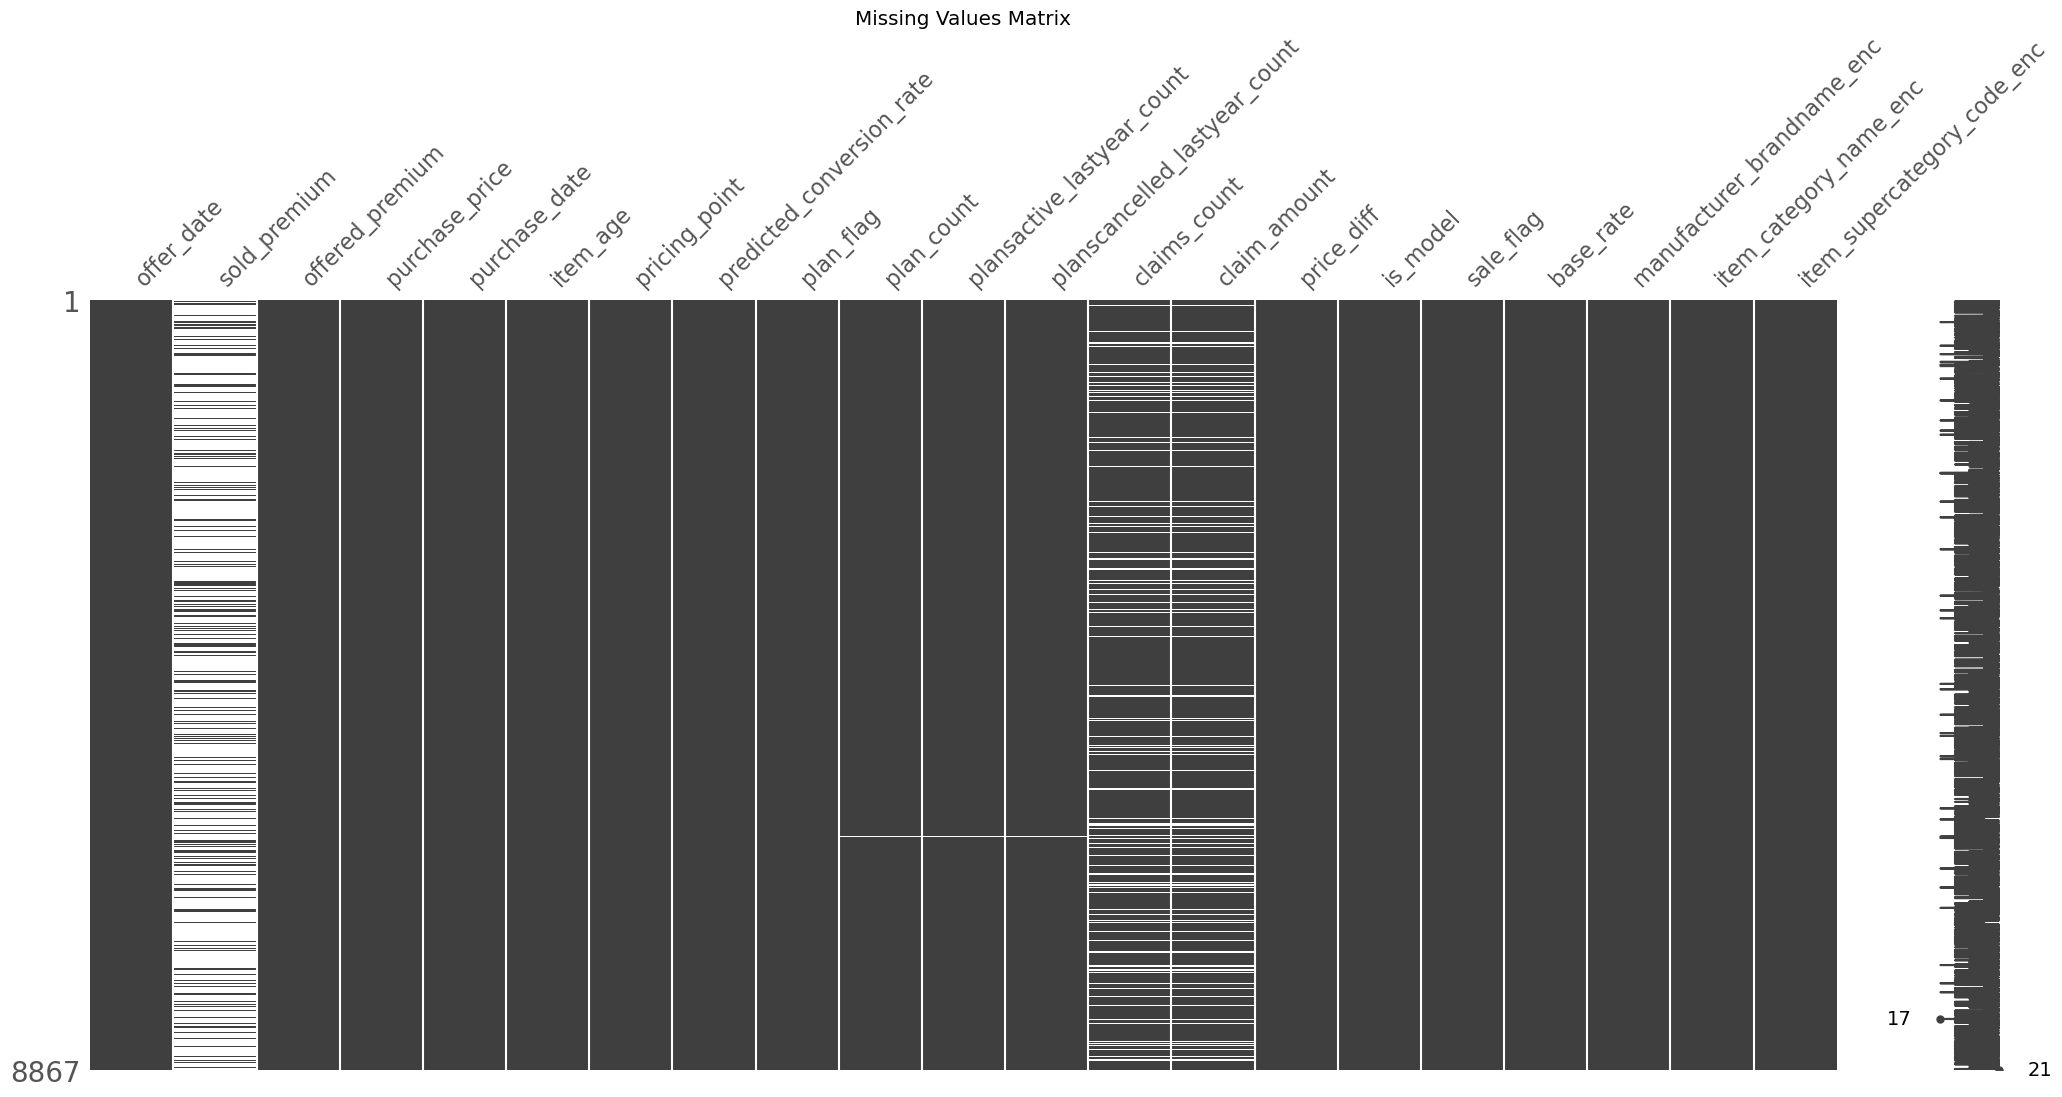

In [17]:
# Visualize missing values
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Missing Values Matrix')

<Axes: >

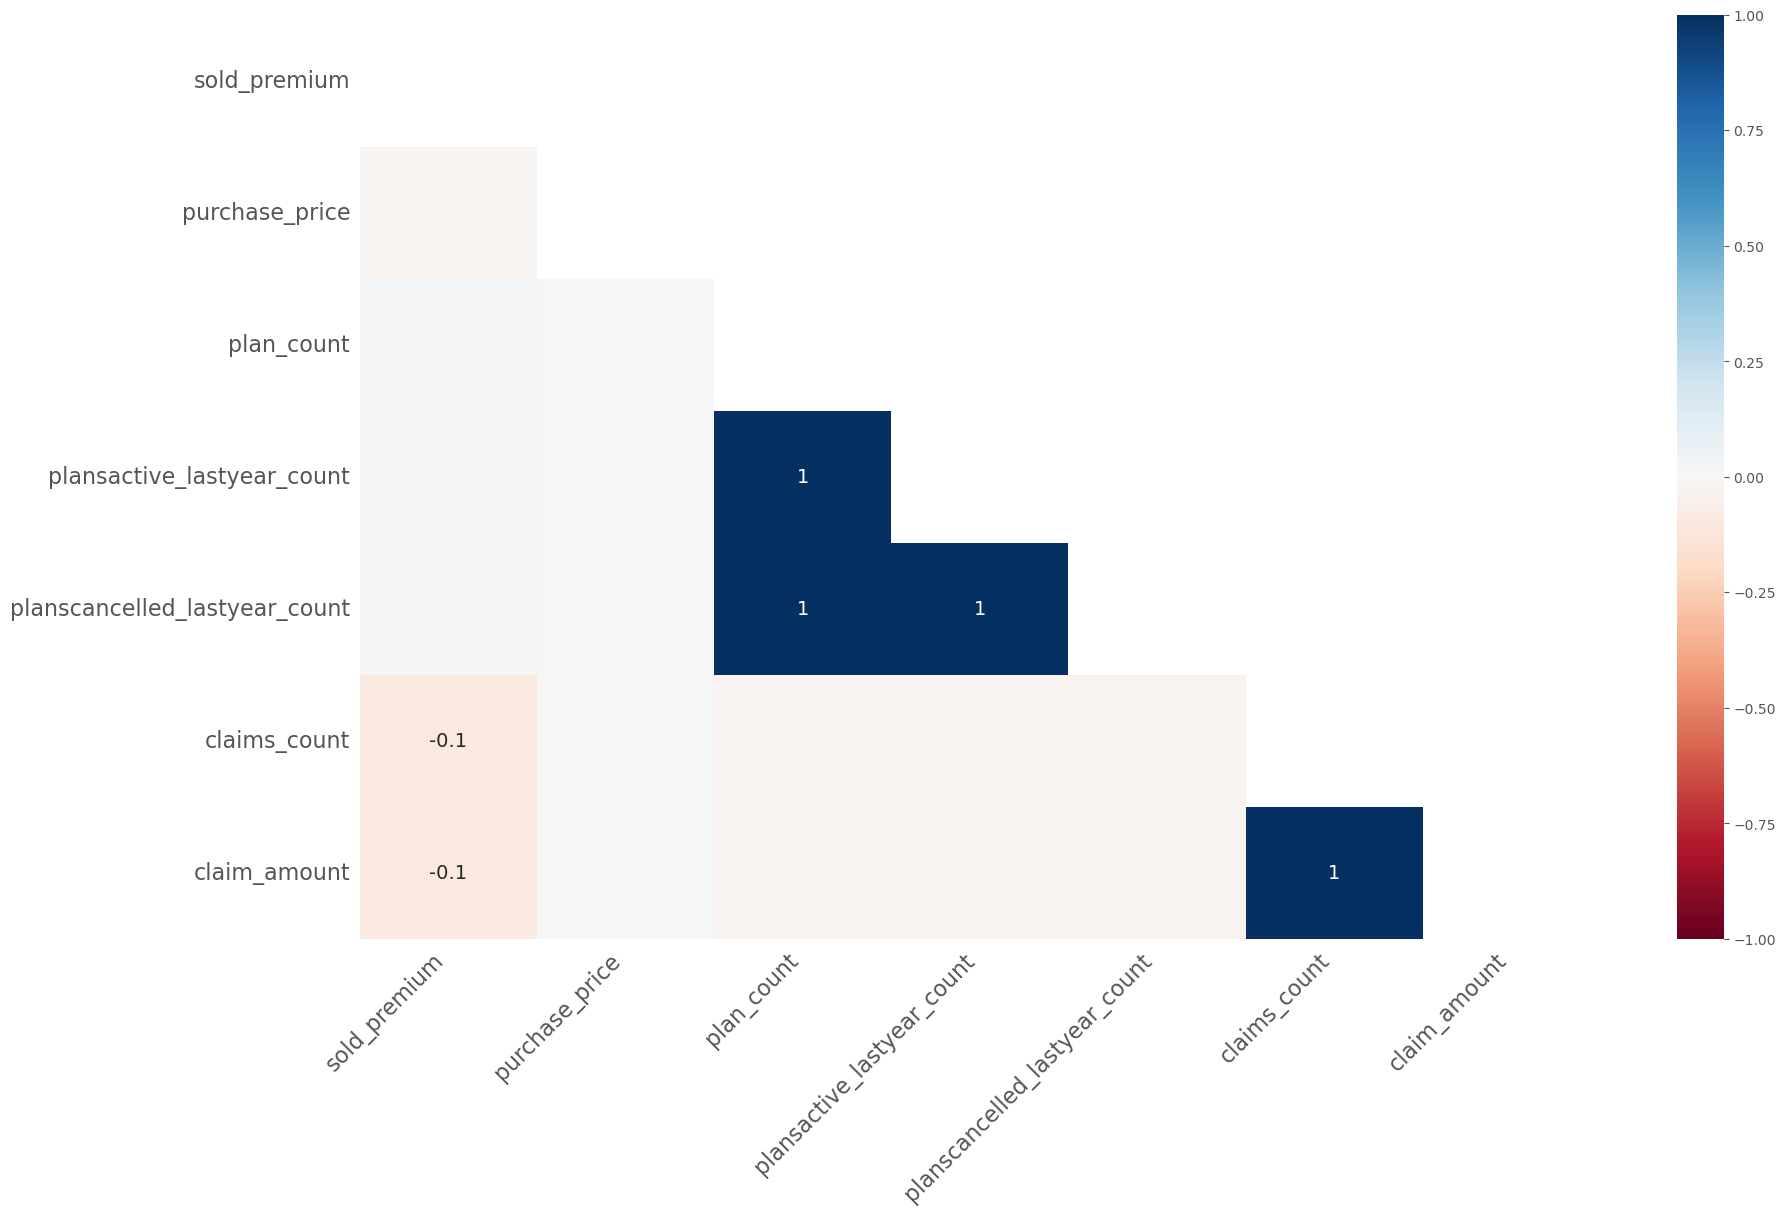

In [18]:
msno.heatmap(df)

Check for missing values in 'purchase_price'

In [19]:
df[df['purchase_price'].isnull()]

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc
2706,2023-04-20,40.2,40.2,NaN,2023-04-04,16,@22%,0.58,1,4,4,0,2,795.0,0.073718,1,1,37.44,123,24,2


In [20]:
# looking for posible simillar items
df[(df['manufacturer_brandname_enc'] == 123) & (df['item_category_name_enc'] == 24)]

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc
2706,2023-04-20,40.2,40.2,NaN,2023-04-04,16,@22%,0.58,1,4,4,0,2,795.0,0.073718,1,1,37.44,123,24,2


In [21]:
df = df.dropna(subset=['purchase_price'])

Check for missing values in 'sold_premium'

In [22]:
df['sold_premium'].isnull().value_counts()

sold_premium
True     6876
False    1990
Name: count, dtype: int64

In [23]:
# Looking for posible items with sold_premium and sale_flag
df[df['sold_premium'].notnull() & (df['sale_flag'] != 1)]

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc


In [24]:
df[(df['sold_premium'].isnull()) & (df['sale_flag'] == 1)]

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc


Check for missing values in plan_count &  plansactive_lastyear_count & planscancelled_lastyear_count

In [25]:
# Looking at their indexes for possilbe batch deletion
df[df['plan_count'].isnull()].index

Index([ 254,  526,  623,  712,  745,  760,  905, 1156, 1386, 1503, 1551, 1990,
       1996, 2321, 2502, 2870, 3404, 3573, 3664, 3868, 4420, 4482, 4775, 4986,
       5019, 5254, 5285, 5853, 5980, 6027, 6178, 6194, 6545, 6764, 6999, 7564,
       7657, 7867, 7874, 7970, 8278],
      dtype='int64')

In [26]:
# Looking at the distribution of plan-related columns
df['plan_count'].value_counts(normalize=True)
# df['plansactive_lastyear_count'].value_counts(normalize=True)
# df['planscancelled_lastyear_count'].value_counts(normalize=True)

plan_count
0     0.80204
1    0.104249
2    0.037167
5    0.024136
3    0.020057
4    0.012351
Name: proportion, dtype: Float64

In [27]:
# Fill NaN values in plan-related columns with 0
Na_plan_columns = ['planscancelled_lastyear_count', 'plansactive_lastyear_count', 'plan_count']
df[Na_plan_columns] = df[Na_plan_columns].fillna(0)

Check for missing values in 'claims_count' and 'amount_count'

In [28]:
df['claims_count'].isnull().value_counts(normalize=True)

claims_count
False    0.870404
True     0.129596
Name: proportion, dtype: float64

In [31]:
df['claims_count'].dropna().value_counts(normalize=True)

claims_count
0     0.898017
1     0.052482
2     0.024103
3     0.012181
4     0.006609
5     0.002851
6     0.001814
7     0.000907
8     0.000389
21     0.00013
11     0.00013
30     0.00013
10     0.00013
24     0.00013
Name: proportion, dtype: Float64

In [32]:
df[df['claims_count'].isnull()]['sale_flag'].value_counts()

sale_flag
0    765
1    384
Name: count, dtype: int64

In [33]:
# Create a missing flag to track missing claims during analysis
df['missing_claims_flag'] = df['claims_count'].isnull().astype(int)

In [34]:
# Grouping potentially relevant columns to be used in the imputation
impute_cols = [
    'claims_count', 
    'claim_amount',
    'plan_count',
    'plansactive_lastyear_count',
    'planscancelled_lastyear_count',
    'purchase_price',
    'item_age',
    'sale_flag'
]
impute_df = df[impute_cols]

In [35]:
# Perform MICE imputation
imputer = IterativeImputer(random_state=0, max_iter=10)

imputed_array = imputer.fit_transform(impute_df)

df[impute_cols] = imputed_array

In [36]:
# Round to nearest integer
df['claims_count'] = df['claims_count'].round().astype('Int64')

In [ ]:
# Set claim_amount to 0.0 where claims_count is 0
df.loc[df['claims_count'] == 0, 'claim_amount'] = 0.0

In [ ]:
# Check the distribution of claims_count after imputation
df.loc[df['missing_claims_flag'] == 1, 'claims_count'].value_counts()

claims_count
0    872
1    233
2     38
3      6
Name: count, dtype: Int64

In [ ]:
# validating the imputation
df[(df['missing_claims_flag'] == 1) & (df['claims_count'] == 3)]

,offer_date,sold_premium,offered_premium,purchase_price,purchase_date,item_age,pricing_point,predicted_conversion_rate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,is_model,sale_flag,base_rate,manufacturer_brandname_enc,item_category_name_enc,item_supercategory_code_enc,missing_claims_flag
1733,2023-03-25,69.36,69.36,311.00,2023-03-03,22.0,@23%,0.51,1,2.0,9.0,7.0,3,431.699301,0.090566,1,1.0,63.60,57,37,4,1
2485,2023-03-01,NaN,48.12,329.98,2021-12-06,450.0,@22%,0.58,1,4.0,9.0,5.0,3,425.898539,0.297735,1,0.0,37.08,129,25,2,1
3335,2023-03-25,40.68,40.68,250.00,2023-03-25,0.0,@23%,0.52,1,3.0,8.0,5.0,3,361.924159,-0.011662,1,1.0,41.16,7,12,4,1
4498,2023-03-16,69.72,69.72,419.00,2023-03-09,7.0,@22%,0.61,1,5.0,8.0,3.0,3,339.258607,0.030142,1,1.0,67.68,57,37,4,1
4647,2023-04-13,NaN,48.24,279.00,2023-04-08,5.0,@23%,0.32,0,0.0,9.0,9.0,3,464.363902,0.049608,1,0.0,45.96,62,11,1,1
4944,2023-03-07,NaN,82.08,400.00,2021-03-07,730.0,@23%,0.56,1,5.0,11.0,2.0,3,331.727005,0.297913,1,0.0,63.24,107,37,4,1


In [42]:
df.loc[df['plansactive_lastyear_count'] >7,'claims_count'].value_counts()

claims_count
3     34
2     33
1     23
0     22
4     13
5     12
6      7
7      6
8      3
21     1
11     1
30     1
10     1
24     1
Name: count, dtype: Int64

In [46]:
df.loc[df['planscancelled_lastyear_count'] >4,'claims_count'].value_counts()

claims_count
2     29
3     17
1     14
0     10
4      8
7      5
5      4
8      2
21     1
6      1
11     1
30     1
10     1
24     1
Name: count, dtype: Int64

Text(0, 0.5, 'Frequency')

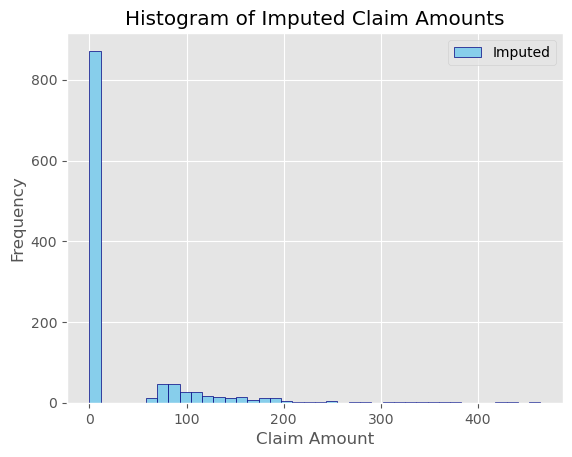

In [ ]:
# Visualize the distribution of imputed claim amounts
df[df['missing_claims_flag'] == 1]['claim_amount'].hist(bins=40, label='Imputed',color='skyblue', edgecolor='navy')

plt.legend()
plt.title('Histogram of Imputed Claim Amounts')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')


Text(0.5, 1.0, 'Comparison of Original vs Imputed Claims Count')

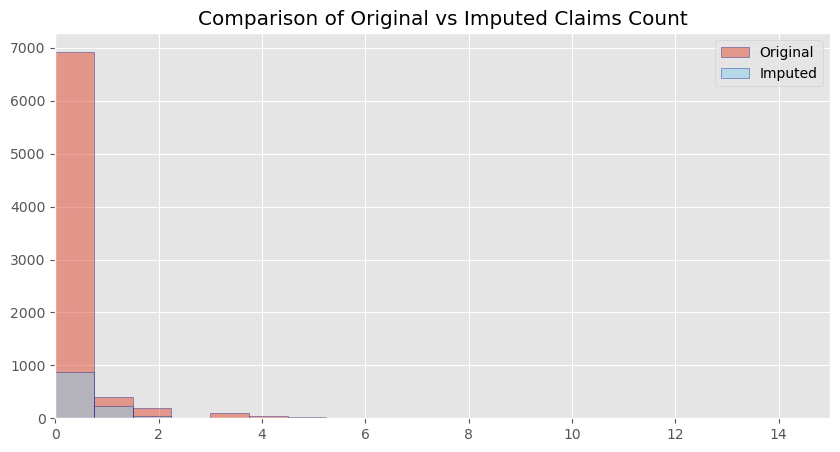

In [45]:
# Compare the distribution of original vs imputed claims count
plt.figure(figsize=(10,5))
df[df['missing_claims_flag'] == 0]['claims_count'].hist(bins=40, alpha=0.5, label='Original', edgecolor='navy')
df[df['missing_claims_flag'] == 1]['claims_count'].hist(bins=4, alpha=0.5,color='skyblue', label='Imputed',edgecolor='navy')

plt.xlim(0, 15)
plt.legend()
plt.title('Comparison of Original vs Imputed Claims Count')

Text(0.5, 1.0, 'Comparison of Original vs Imputed Claim Amounts')

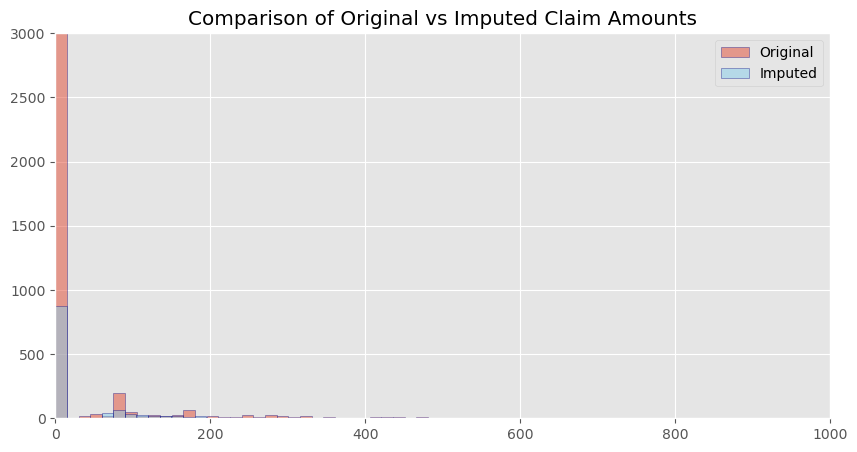

In [46]:
# Compare the distribution of original vs imputed claims Amounts
plt.figure(figsize=(10,5))
df[df['missing_claims_flag'] == 0]['claim_amount'].hist(bins=700, alpha=0.5, label='Original', edgecolor='navy')
df[df['missing_claims_flag'] == 1]['claim_amount'].hist(bins=31, alpha=0.5,color='skyblue', label='Imputed', edgecolor='navy')
plt.legend()
plt.xlim(0, 1000)
plt.ylim(0, 3000)
plt.title('Comparison of Original vs Imputed Claim Amounts')

### Exploratory data analysis

array([[<Axes: title={'center': 'base_rate'}>,
        <Axes: title={'center': 'offered_premium'}>,
        <Axes: title={'center': 'sold_premium'}>],
       [<Axes: title={'center': 'price_diff'}>,
        <Axes: title={'center': 'purchase_price'}>,
        <Axes: title={'center': 'item_age'}>],
       [<Axes: title={'center': 'predicted_conversion_rate'}>,
        <Axes: title={'center': 'plansactive_lastyear_count'}>,
        <Axes: title={'center': 'planscancelled_lastyear_count'}>],
       [<Axes: title={'center': 'claims_count'}>,
        <Axes: title={'center': 'claim_amount'}>, <Axes: >]], dtype=object)

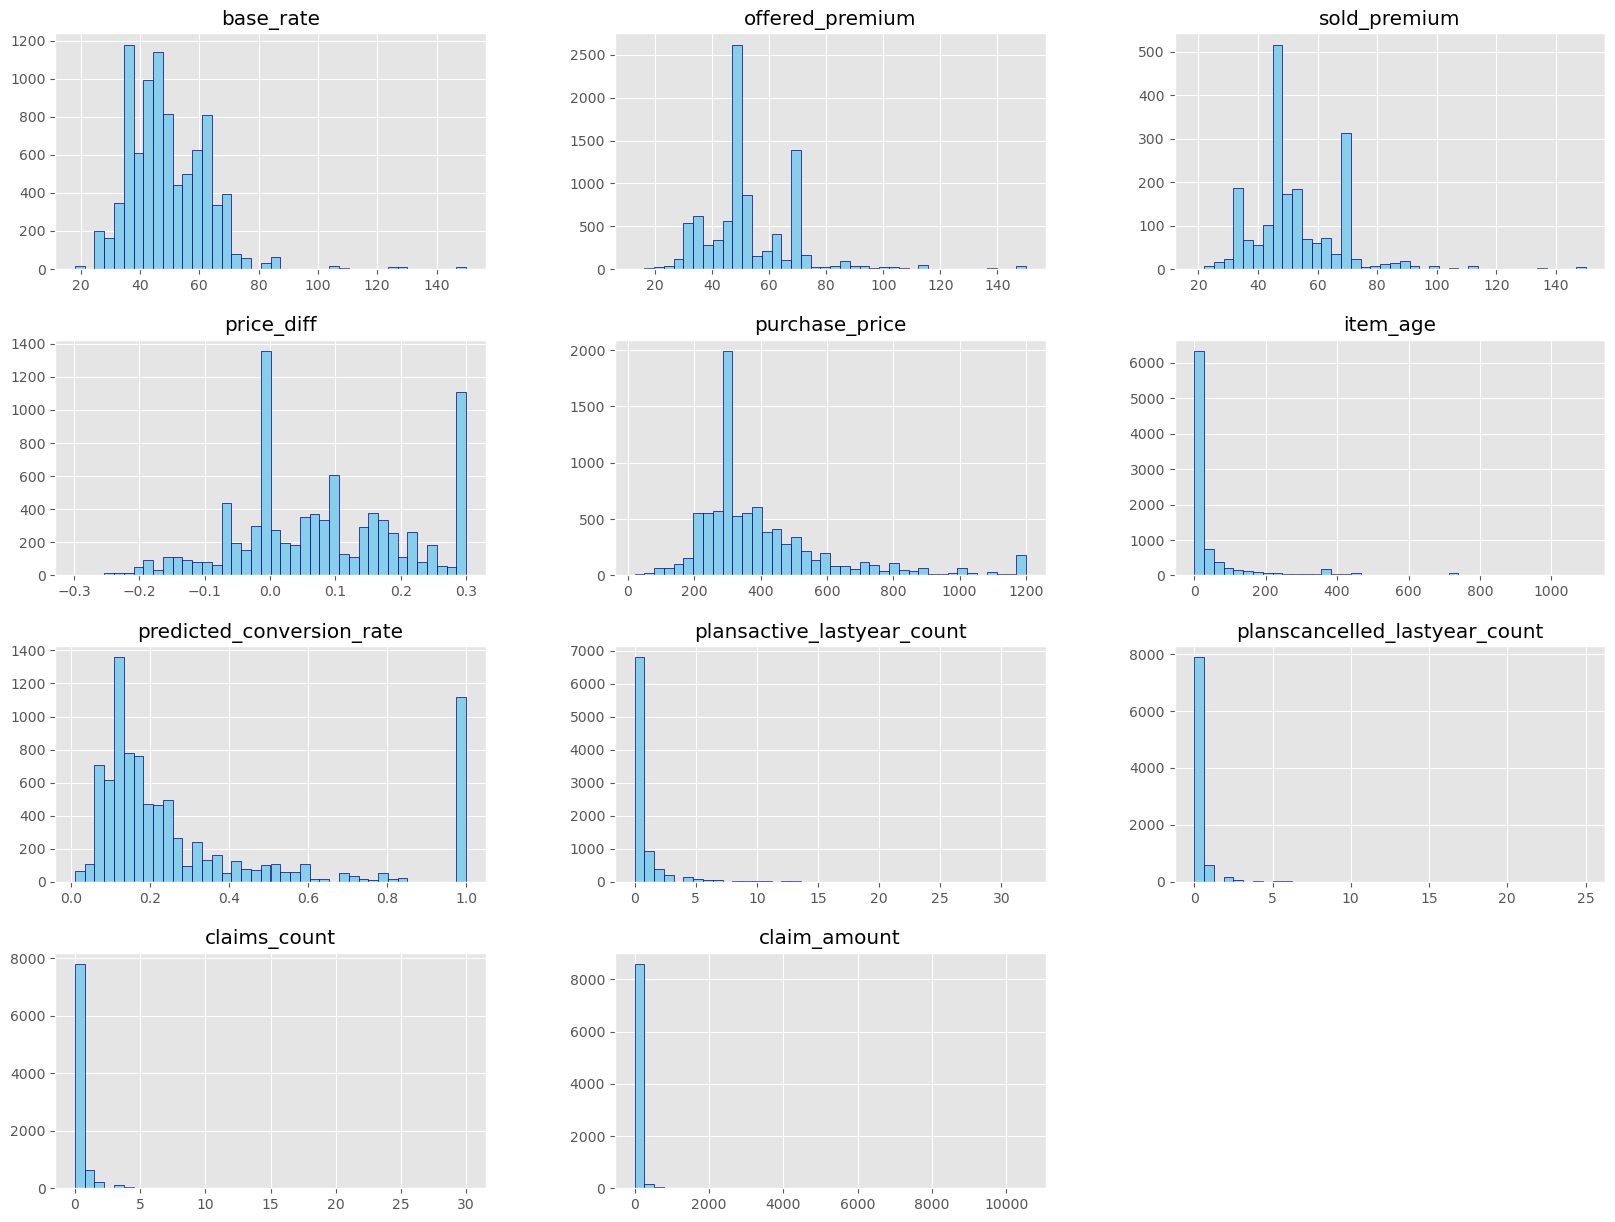

In [55]:
# numerical columns visualization
num_cols = ['base_rate', 'offered_premium', 'sold_premium', 'price_diff', 'purchase_price', 'item_age','predicted_conversion_rate','plansactive_lastyear_count','planscancelled_lastyear_count','claims_count','claim_amount']
df[num_cols].hist(bins=40, figsize=(20,15),color='skyblue', edgecolor='navy')

In [51]:
# age column percentiles
percentiles = [0.25, 0.5,  0.75, 0.90, 0.95, 0.99, 1.0]
summary = df['item_age'].quantile(percentiles)
summary.index = [f"{int(p*100)}%" for p in summary.index]
summary


25%        1.0
50%        7.0
75%       33.0
90%      174.0
95%      365.0
99%      730.0
100%    1096.0
Name: item_age, dtype: float64

In [52]:
# claim amount column percentiles
percentiles = [0.25, 0.5,  0.75, 0.90, 0.95, 0.99, 1.0]
summary = df.loc[df['claims_count'] > 0]['claim_amount'].quantile(percentiles)
summary.index = [f"{int(p*100)}%" for p in summary.index]
summary

25%        85.0300
50%       133.0900
75%       263.8150
90%       487.5530
95%       715.0795
99%      1654.6870
100%    10523.0300
Name: claim_amount, dtype: float64

In [53]:
# claim count column percentiles
percentiles = [0.25, 0.5,  0.75, 0.90, 0.95, 0.99, 1.0]
summary = df['claims_count'].quantile(percentiles)
summary.index = [f"{int(p*100)}%" for p in summary.index]
summary

25%      0.0
50%      0.0
75%      0.0
90%      1.0
95%      1.0
99%      4.0
100%    30.0
Name: claims_count, dtype: Float64

In [54]:
# Summary table for plan_flag
counts = df['plan_flag'].value_counts()
percentages = df['plan_flag'].value_counts(normalize=True)
summary_table = pd.DataFrame({'Count': counts,'Percentage': percentages})
summary_table['Percentage'] = (summary_table['Percentage'] * 100).round(2).astype(str) + '%'
summary_table

,Count,Percentage
plan_flag,,
0,7119,80.3%
1,1747,19.7%


In [55]:
# Summary table for is_model
counts = df['is_model'].value_counts()
percentages = df['is_model'].value_counts(normalize=True)
summary_table = pd.DataFrame({'Count': counts,'Percentage': percentages})
summary_table['Percentage'] = (summary_table['Percentage'] * 100).round(2).astype(str) + '%'
summary_table

,Count,Percentage
is_model,,
1,7749,87.4%
0,1117,12.6%


In [56]:
# Summary table for sale_flag
counts = df['sale_flag'].value_counts()
percentages = df['sale_flag'].value_counts(normalize=True)
summary_table = pd.DataFrame({'Count': counts,'Percentage': percentages})
summary_table['Percentage'] = (summary_table['Percentage'] * 100).round(2).astype(str) + '%'
summary_table

,Count,Percentage
sale_flag,,
0.0,6876,77.55%
1.0,1990,22.45%


<Axes: ylabel='pricing_point'>

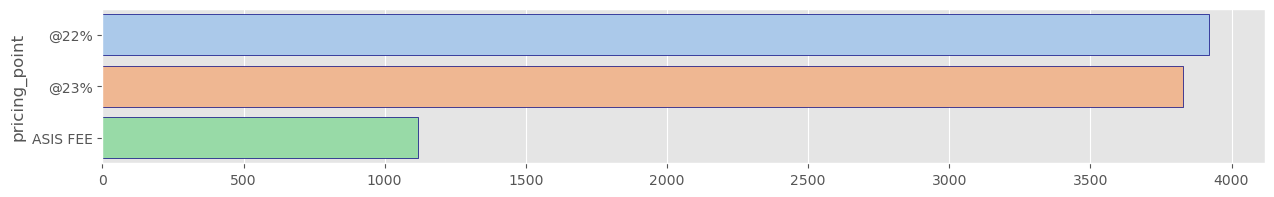

In [62]:
# pricing_point columns visualization
plt.figure(figsize=(15, 2))
counts = df['pricing_point'].value_counts()
sns.barplot(x=counts.values,y=counts.index,palette='pastel',edgecolor='navy',)

In [50]:
# Summary table for pricing_point
df.groupby('pricing_point')[['base_rate', 'offered_premium', 'sold_premium', 'price_diff','sale_flag']].mean()


,base_rate,offered_premium,sold_premium,price_diff,sale_flag
pricing_point,,,,,
@22%,49.203957,55.216430,55.768714,0.124335,0.220041
@23%,49.014236,51.976650,51.482768,0.059686,0.226548
ASIS FEE,48.967628,48.967628,49.572923,0.000000,0.232766


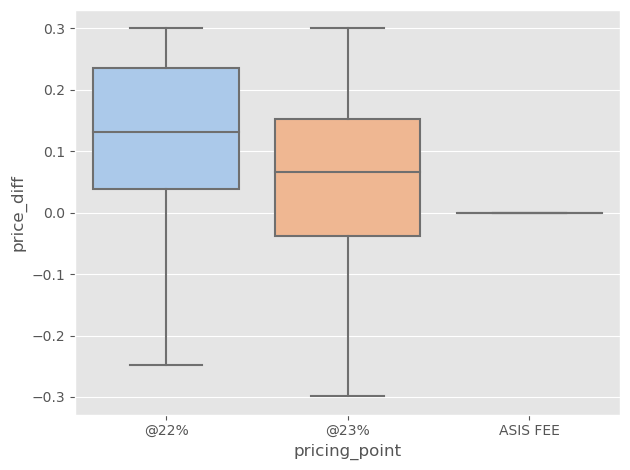

In [61]:
# Visualize the distribution of price differences by pricing point
sns.boxplot(x='pricing_point',palette='pastel', y='price_diff', data=df)
plt.tight_layout()

Text(0.5, 1.0, 'Boxplot of price_diff by sale_flag')

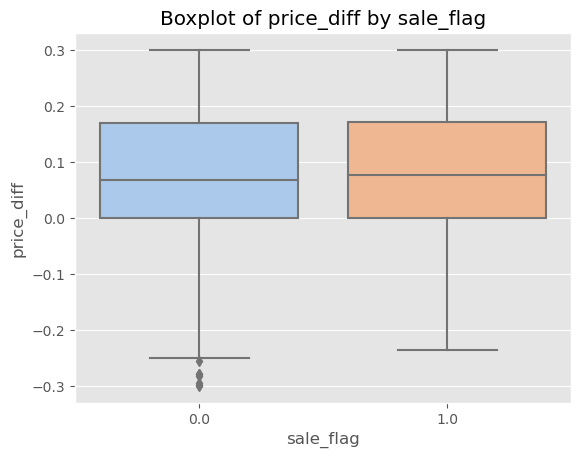

In [60]:
# Visualize the distribution of price differences by sale_flag
sns.boxplot(x='sale_flag', y='price_diff', data=df, palette='pastel', showfliers=True)
plt.title('Boxplot of price_diff by sale_flag')


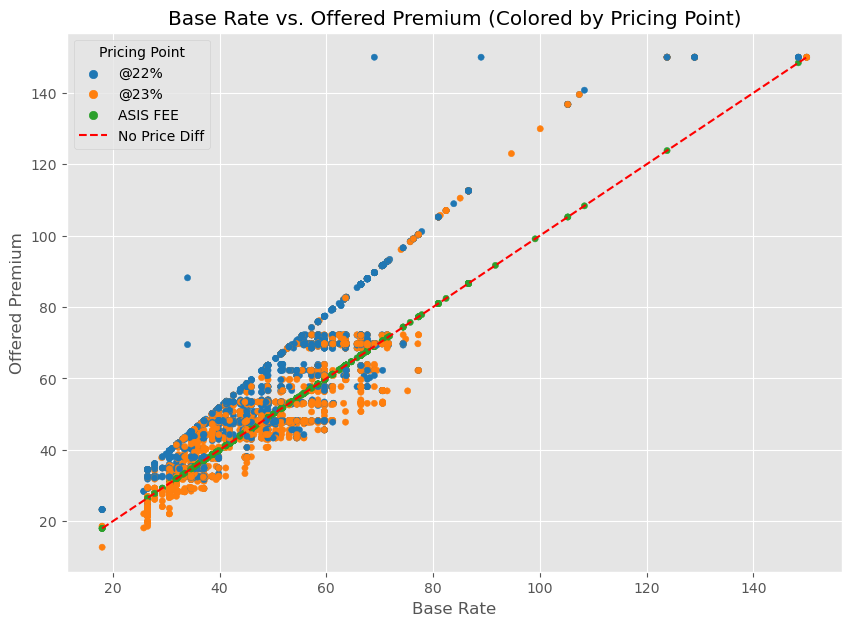

In [71]:
# Scatter plot of base_rate vs offered_premium

plt.figure(figsize=(10,7))

sns.scatterplot(
    x='base_rate',
    y='offered_premium',
    hue='pricing_point', 
    palette='tab10',   
    data=df,
    s=20,
    edgecolor=None
)

# Reference y=x line
plt.plot([df['base_rate'].min(), df['base_rate'].max()], 
         [df['base_rate'].min(), df['base_rate'].max()], 
         'r--', label='No Price Diff')

plt.title('Base Rate vs. Offered Premium (Colored by Pricing Point)')
plt.xlabel('Base Rate')
plt.ylabel('Offered Premium')
plt.legend(title='Pricing Point')

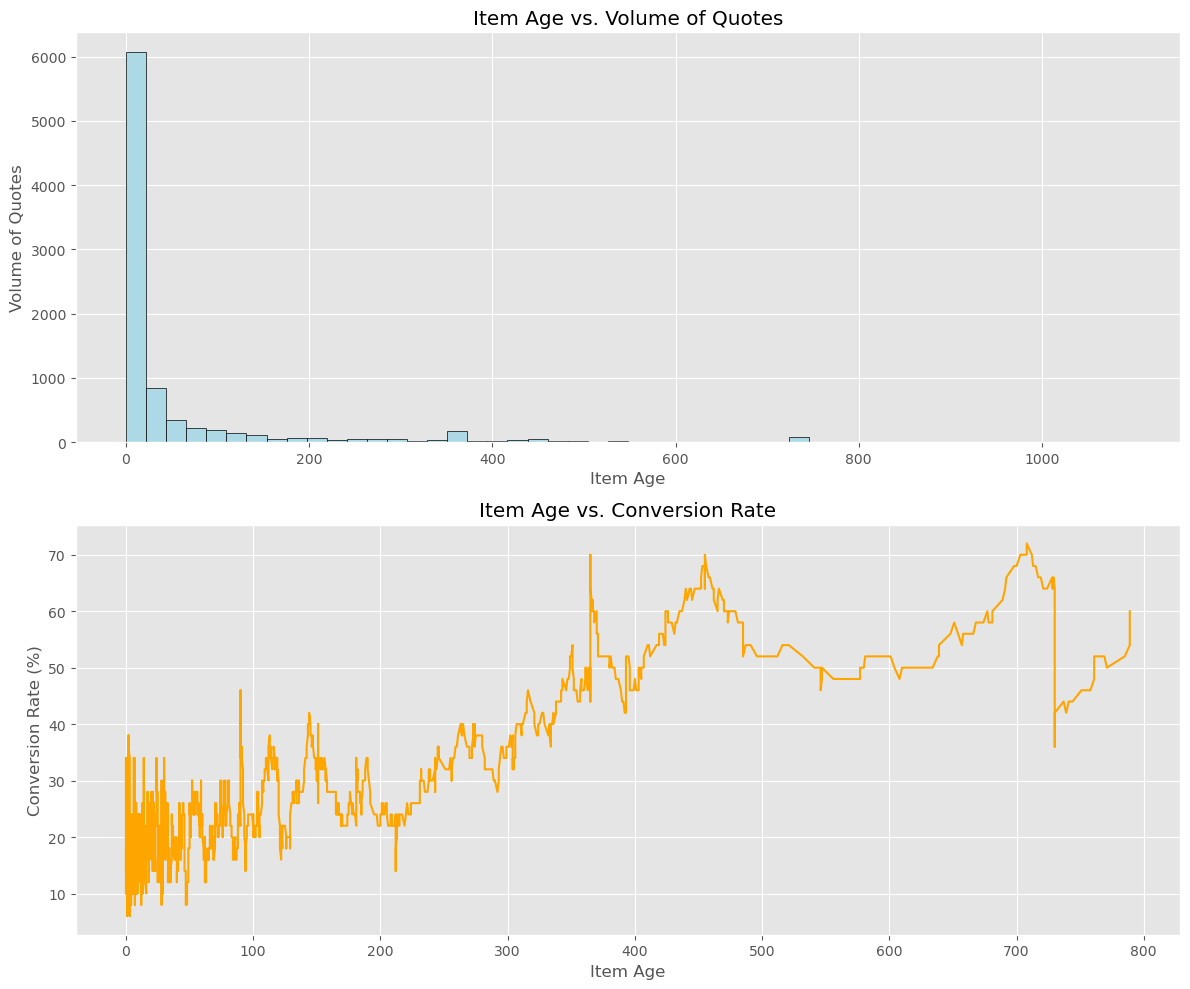

In [63]:
# plot of Age vs quotes and conversion rate
df_sorted = df.sort_values('item_age')
df_sorted['Rolling_Conversion_Rate'] = df_sorted['sale_flag'].rolling(window=50, center=True).mean() * 100

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Item Age vs. Volume of Quotes
axes[0].hist(df['item_age'], bins=50, color='lightblue', edgecolor='black')
axes[0].set_xlabel('Item Age')
axes[0].set_ylabel('Volume of Quotes')
axes[0].set_title('Item Age vs. Volume of Quotes')

# Item Age vs. Conversion Rate
axes[1].plot(df_sorted['item_age'], df_sorted['Rolling_Conversion_Rate'], color='orange')
axes[1].set_xlabel('Item Age')
axes[1].set_ylabel('Conversion Rate (%)')
axes[1].set_title('Item Age vs. Conversion Rate')

plt.tight_layout()


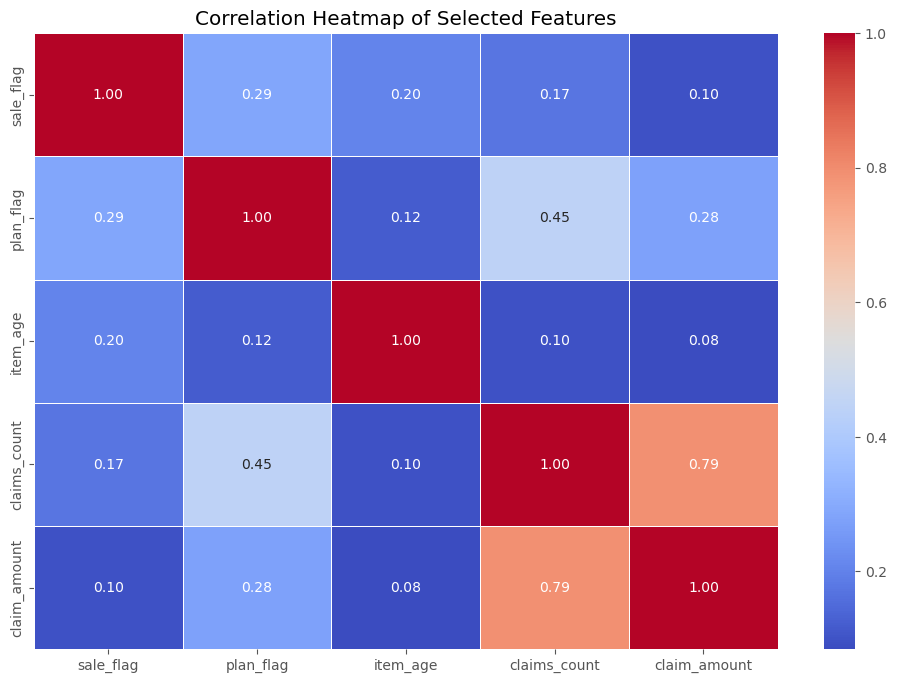

In [ ]:
# Correlation heatmap
selected_cols = ['sale_flag', 'plan_flag', 'item_age', 'claims_count', 'claim_amount']
df_subset = df[selected_cols]

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_subset.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


### Compare pricing strategy performance